In [1]:
using JuMP, GLPK

# Definir los parámetros
d = [180, 250, 190, 140, 220, 250]  # Demanda mensual
c = [50, 45, 55, 52, 48, 50]        # Costo de producción
h = [8, 10, 10, 10, 8, 8]           # Costo de almacenamiento
C = 225                             # Capacidad máxima de producción mensual

# Crear el modelo
model = Model(GLPK.Optimizer)

# Definir las variables de decisión (producción y almacenamiento en cada mes)
@variable(model, x[1:6] >= 0)  # Ventanas producidas en cada mes
@variable(model, I[1:6] >= 0)  # Inventario de ventanas al final de cada mes

# Función objetivo: minimizar costos de producción y almacenamiento
@objective(model, Min, sum(c[i] * x[i] + h[i] * I[i] for i in 1:6))

# Restricciones de capacidad de producción
for i in 1:6
    @constraint(model, x[i] <= C)
end

# Balance de inventarios (I_0 = 0, inventario inicial)
@constraint(model, I[1] == x[1] - d[1])
for i in 2:6
    @constraint(model, I[i] == I[i-1] + x[i] - d[i])
end

# Optimizar el modelo
optimize!(model)

# Obtener la producción óptima y los inventarios
produccion_optima = value.(x)
inventario_optimo = value.(I)

# Mostrar los resultados
for i in 1:6
    println("Mes $i: Producción = $(produccion_optima[i]) ventanas, Inventario = $(inventario_optimo[i]) ventanas")
end

# Calcular el costo total óptimo
costo_total_optimo = objective_value(model)
println("Costo total óptimo: $costo_total_optimo")


Mes 1: Producción = 205.0 ventanas, Inventario = 25.0 ventanas
Mes 2: Producción = 225.0 ventanas, Inventario = 0.0 ventanas
Mes 3: Producción = 190.0 ventanas, Inventario = 0.0 ventanas
Mes 4: Producción = 160.0 ventanas, Inventario = 20.0 ventanas
Mes 5: Producción = 225.0 ventanas, Inventario = 25.0 ventanas
Mes 6: Producción = 225.0 ventanas, Inventario = 0.0 ventanas
Costo total óptimo: 61795.0


In [4]:
using Pkg

# Instalar el paquete JuMP
Pkg.add("Plots")


    Updating registry at `C:\Users\javie\.julia\registries\General.toml`
   Resolving package versions...
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed JpegTurbo_jll ──────────────── v3.0.4+0
   Installed GR_jll ─────────────────────── v0.73.7+0
   Installed Libmount_jll ───────────────── v2.40.1+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed Measures ───────────────────── v0.3.2
   Installed Unitful ────────────────────── v1.21.0
   Installed ConcurrentUtilities ────────── v2.4.2
   Installed Contour ────────────────────── v0.6.3
   Installed Grisu ──────────────────────── v1.0.2
   Installed ColorSchemes ───────────────── v3.26.0
   In

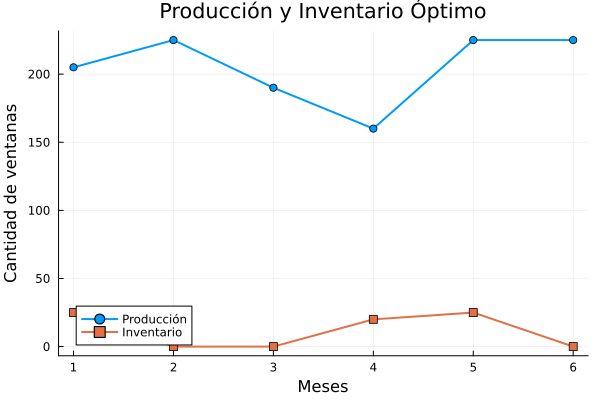

In [5]:
using Plots

# Datos para la gráfica
meses = 1:6

# Gráfico de la producción y el inventario
plot(meses, produccion_optima, label="Producción", lw=2, marker=:circle, xlabel="Meses", ylabel="Cantidad de ventanas")
plot!(meses, inventario_optimo, label="Inventario", lw=2, marker=:square, xlabel="Meses", ylabel="Cantidad de ventanas", title="Producción y Inventario Óptimo")


In [6]:
# Producción exacta a demanda
produccion_demanda = d
inventario_demanda = [0 for _ in 1:6]  # Sin inventario, se produce exactamente la demanda

# Calcular los costos de producción y almacenamiento
costo_produccion_demanda = sum(c[i] * produccion_demanda[i] for i in 1:6)
costo_inventario_demanda = sum(h[i] * inventario_demanda[i] for i in 1:6)
costo_total_demanda = costo_produccion_demanda + costo_inventario_demanda

# Comparar costos
println("Costo total con producción exacta a demanda: $costo_total_demanda")
println("Ahorro generado con la producción óptima: $(costo_total_demanda - costo_total_optimo)")


Costo total con producción exacta a demanda: 61040
Ahorro generado con la producción óptima: -755.0


In [9]:
# USANDO VARIABLES ENTERAS
using JuMP, GLPK

# Crear un nuevo modelo para asegurar que no haya conflictos
model = Model(GLPK.Optimizer)

# Definir las variables de decisión como variables continuas (sin restricciones enteras)
@variable(model, x[1:6] >= 0)  # Ventanas producidas en cada mes (continuas)
@variable(model, I[1:6] >= 0)  # Inventario de ventanas al final de cada mes (continuas)

# Parámetros del problema
d = [180, 250, 190, 140, 220, 250]  # Demanda mensual
c = [50, 45, 55, 52, 48, 50]        # Costo de producción
h = [8, 10, 10, 10, 8, 8]           # Costo de almacenamiento
C = 225                             # Capacidad máxima de producción mensual

# Definir la función objetivo: minimizar costos de producción y almacenamiento
@objective(model, Min, sum(c[i] * x[i] + h[i] * I[i] for i in 1:6))

# Restricciones de capacidad de producción
for i in 1:6
    @constraint(model, x[i] <= C)
end

# Balance de inventarios (I_0 = 0, inventario inicial)
@constraint(model, I[1] == x[1] - d[1])
for i in 2:6
    @constraint(model, I[i] == I[i-1] + x[i] - d[i])
end

# Optimizar el modelo
optimize!(model)

# Verificar si la solución es óptima
if termination_status(model) == MOI.OPTIMAL
    # Obtener la producción óptima y los inventarios
    produccion_optima_continua = value.(x)
    inventario_optimo_continuo = value.(I)

    # Mostrar los resultados mes a mes
    for i in 1:6
        println("Mes $i: Producción = $(produccion_optima_continua[i]) ventanas, Inventario = $(inventario_optimo_continuo[i]) ventanas")
    end

    # Calcular el costo total con variables continuas
    costo_total_optimo_continuo = objective_value(model)
    println("Costo total óptimo con variables continuas: $costo_total_optimo_continuo")
else
    println("No se encontró una solución óptima.")
end


Mes 1: Producción = 205.0 ventanas, Inventario = 25.0 ventanas
Mes 2: Producción = 225.0 ventanas, Inventario = 0.0 ventanas
Mes 3: Producción = 190.0 ventanas, Inventario = 0.0 ventanas
Mes 4: Producción = 160.0 ventanas, Inventario = 20.0 ventanas
Mes 5: Producción = 225.0 ventanas, Inventario = 25.0 ventanas
Mes 6: Producción = 225.0 ventanas, Inventario = 0.0 ventanas
Costo total óptimo con variables continuas: 61795.0
